# Regularized Linear Regression and Bias-Variance

In this exercise, we will implement regularized linear regression and use it to study models with different bias-variance properties. 

There are three parts:
- Write functions to calculate regularized linear regression cost and gradient, and train linear Regression.
- Write function to draw learning curves, which show train errors and cross validation erros. Show learning curves for previous trained linear regression model.
- Add polynomial features, train linear model, and draw learning curves. Finally, we use cross validation to select regularization parameter lambda.

## 1. Regularized Linear Regression

In the first half of the exercise, we will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, we will go through some diagnostics of debugging learning algorithms and examine the effects of bias vs variance.

## 1.1 Loading and Visualizing Data

We will begin by visualizing the dataset containing historical records on the change in the water level, x, and the amount of water flowing out of the dam, y.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io
from scipy.optimize import fmin_bfgs

In [2]:
data = scipy.io.loadmat('ex5data1.mat')

The dataset is divided into three parts:

- A training set that our model will learn on: X, y
- A cross validation set for determining the regularization parameter: Xval, yval
- A test set for evaluating performance: Xtest, ytest

In [3]:
X = data['X']
Xtest = data['Xtest']
Xval = data['Xval']
y = data['y']
ytest = data['ytest']
yval = data['yval']
m = X.shape[0]

In [4]:
# in order to use fmin_bfgs and for convenience, we represent y to be a 1-d array rather than a 2-d array. 
y = y.reshape([len(y),])
ytest = ytest.reshape([len(ytest),])
yval = yval.reshape([len(yval),])

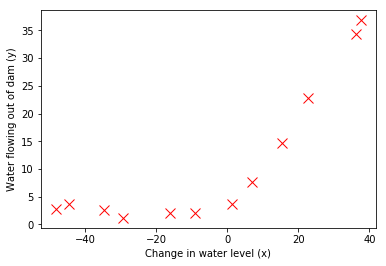

In [5]:
# plot the training data
plt.plot(X,y,'rx', markersize = 10, linewidth = 1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of dam (y)')
plt.show()

In the following parts, we will implement linear regression and use that to fit a straight line to the data and plot learning curves. Following that, we will implement polynomial regression to find a better fit to the data.

## 1.2 Regularized Linear Regression Cost and Gradient

In [6]:
# linearRegCostFunction() calculate the regularized linear regression cost function.
def linearRegCostFunction(theta, X, y, reg_lambda):
    m = len(y)
    diff = np.dot(X,theta)-y
    J = np.dot(diff.T, diff) + reg_lambda*np.dot(theta[1:].T, theta[1:])
    J = J/float(2*m)
    return J

In [7]:
# linearRegGradient() calculate the gradient
def linearRegGradient(theta, X, y, reg_lambda):
    m = len(y)
    diff = np.dot(X,theta)-y
    grad = np.dot(X.T, diff)
    grad[1:] = grad[1:] + reg_lambda * theta[1:]
    grad = grad/float(m)
    return grad

In [8]:
# use above functions to calculate J and grad at a specific theta
theta  =np.array([1,1])
X_withones = np.append(np.ones([m,1]), X, 1)
J = linearRegCostFunction(theta, X_withones, y, 1)
grad = linearRegGradient(theta, X_withones, y, 1)
print('When theta is {}'.format(theta))
print('Cost is {}'.format(J))
print('Gradient is {}'.format(grad))

When theta is [1 1]
Cost is 303.99319222
Gradient is [-15.30301567 598.25074417]


## 1.3 Train Linear Regression

In [9]:
# trainLinearReg() trains linear regression given a dataset (X,y) and a regularization parameter lambda
def trainLinearReg(X, y, reg_lambda, maxiter=50):
    initial_theta = np.zeros([X.shape[1],])
    theta = fmin_bfgs(linearRegCostFunction, initial_theta, fprime=linearRegGradient,args=(X,y,reg_lambda),maxiter=maxiter)
    return theta

In [10]:
# train linear regression with lambda = 0
reg_lambda = 0
theta = trainLinearReg(X_withones, y, reg_lambda, 50)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


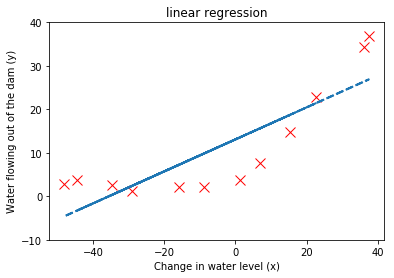

In [11]:
# plot fit over the data
plt.plot(X, y, 'rx', markersize = 10, linewidth = 1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(X_withones,theta), '--', linewidth = 2)
plt.title('linear regression')
plt.ylim([-10,40])
plt.show()

## 2. Bias - variance

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

In this part of the exercise, we will plot training and test errors on a learning curve to diagnose bias-variance problems.

## 2.1 Learning Curve for Linear Regression

We will now implement code to generate the learning curves that will be usefull in debugging learning algorithms. A learning curve plots training and cross validation error as a function of training set size.

To plot the learning curve, we need a training and cross validation set error for different training set sizes.

In [12]:
# learningCurve() generates the train and cross validation set errors needed to plot a learning curve 
# In particular, note that the training error does not include the regularization term.
def learningCurve(X, y, Xval, yval, reg_lambda):
    m_X = X.shape[0]
    m_Xval = Xval.shape[0]
    error_train = np.zeros([m_X,])
    error_val = np.zeros([m_X,])
    for i in range(m_X):
        Xtrain = X[:i+1,:]
        train_size = Xtrain.shape[0]
        theta = trainLinearReg(Xtrain, y[:i+1], reg_lambda)
        d_train = np.dot(Xtrain, theta) - y[:i+1]
        error_train[i] = np.dot(d_train.T, d_train)/float(2*(i+1))
        d_val = np.dot(Xval, theta) - yval
        error_val[i] = np.dot(d_val.T, d_val)/float(2*m_Xval)
    return error_train, error_val

In [13]:
# set lambda to be 0 and calculate train errors and cross validation errors.
reg_lambda = 0
Xval_withones = np.append(np.ones([Xval.shape[0],1]), Xval, 1)
error_train, error_val = learningCurve(X_withones, y, Xval_withones, yval, reg_lambda)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 3
         Function evaluations: 5
         Gradient

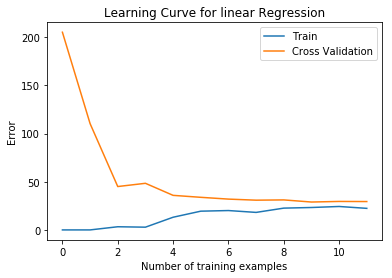

In [14]:
# plot learning curve for linear regression
plt.plot(range(m),error_train)
plt.plot(range(m),error_val)
plt.title('Learning Curve for linear Regression')
plt.legend(['Train','Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

In the above figure, we can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model- the linear regression model is too simple and is unable to fit our dataset weill. In the next section, we will implement polynomial regression to fit a better model for this dataset.

In [15]:
print('Training Examples | Train Error | Cross Validation Error')
for i in range(m):
    print('{} | {} | {}'.format(i, error_train[i], error_val[i]))

Training Examples | Train Error | Cross Validation Error
0 | 3.94430452611e-31 | 205.121095745
1 | 4.93038065763e-32 | 110.300366108
2 | 3.2865950455 | 45.0102313786
3 | 2.8426776894 | 48.3689098704
4 | 13.1540488091 | 35.8651647503
5 | 19.4439625125 | 33.8299615971
6 | 20.0985216551 | 31.9709857982
7 | 18.1728586952 | 30.8624463238
8 | 22.609405425 | 31.135997955
9 | 23.2614615926 | 28.9362074683
10 | 24.317249588 | 29.551431622
11 | 22.3739064951 | 29.4338181299


## 3. Polynomial regression

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exerceise, we will address this problem by adding more features.

## 3.1 Feature Mapping for Polynomial Regression

We will add more features using the higher powers of the existing feature x in the dataset. 

In [16]:
# polyFeatures() maps X (1D vector) into the p-th power
def polyFeatures(X,p):
    m = X.shape[0]
    X = X.reshape([m,])
    X_poly = np.zeros([m,p])
    X_poly[:,0] = X
    for i in range(1,p):
        X_poly[:,i] = X_poly[:,i-1]*X
    return X_poly

In [17]:
# featureNormalize() normalizes the features in X. 
# It returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
def featureNormalize(X):
    mu = np.mean(X,0)
    sigma = np.std(X, 0, ddof = 1)
    X_norm = np.zeros([X.shape[0], X.shape[1]])
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [18]:
# choose p=8 and map X onto polynomial features and normalize
p = 8
X_poly = polyFeatures(X,p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.append(np.ones([m,1]), X_poly, 1)

In [19]:
#  Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval,p)
X_poly_val = (X_poly_val - mu)/sigma
X_poly_val = np.append(np.ones([X_poly_val.shape[0],1]), X_poly_val, 1)

In [20]:
# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu)/sigma
X_poly_test = np.append(np.ones([X_poly_test.shape[0],1]), X_poly_test,1)

In [21]:
print('Normalized Traing Example 1:')
print(X_poly[0,:])

Normalized Traing Example 1:
[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


## 3.2 Learning Curve for Polynomail Regression

We will proceed to train polynomial regression using linar regression cost function. Even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem.

In [22]:
def plotFit(min_x, max_x, mu, sigma, theta, p, X, y):
    plt.plot(X,y,'rx', markersize = 10, linewidth = 1.5)
    x = np.arange(min_x - 15, max_x + 15, 0.05)
    x = x.T
    x_poly = polyFeatures(x,p)
    x_poly = (x_poly - mu) / sigma
    x_poly = np.append(np.ones([x_poly.shape[0],1]), x_poly, 1)
    plt.plot(x, np.dot(x_poly, theta), '--', linewidth  =2)
    plt.show()

         Current function value: 0.133546
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51


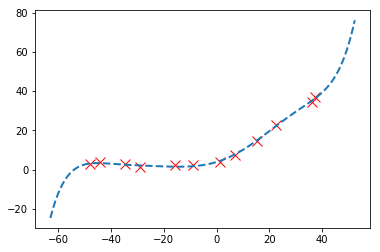

In [23]:
reg_lambda = 0
theta = trainLinearReg(X_poly, y, reg_lambda)
plotFit(np.min(X), np.max(X), mu, sigma, theta, p, X, y)

when lambda = 0 , we see that the polynomail fit is able to follow the datapoints very well. However, the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomail regression model is overfiting the training data and will not generalize well.

In [24]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, reg_lambda)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 37
         

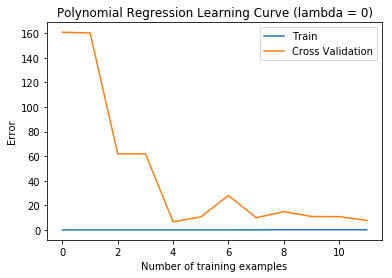

In [25]:
plt.plot(range(m),error_train)
plt.plot(range(m),error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(reg_lambda))
plt.legend(['Train','Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

## 3.3 Adjusting the regularization parameter

One way to combat the overfitting problem is to add regularization to the model. Next we try lambda = 3 and lambda = 100.

### lambda = 3

Optimization terminated successfully.
         Current function value: 15.867688
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16


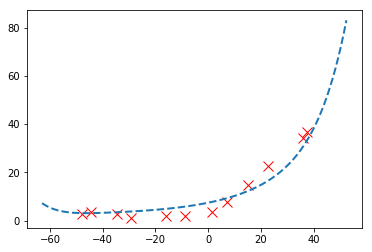

In [26]:
reg_lambda = 3
theta = trainLinearReg(X_poly, y, reg_lambda)
plotFit(np.min(X), np.max(X), mu, sigma, theta, p, X, y)

In [27]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, reg_lambda)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.096527
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 42.276062
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 36.339042
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 29.096616
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 25.786542
         Iterations: 11
         Function evaluations: 12
      

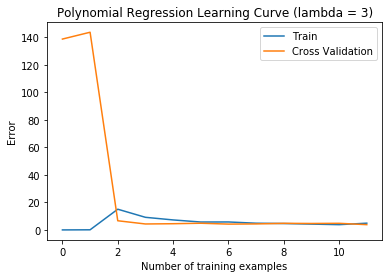

In [28]:
plt.plot(range(m),error_train)
plt.plot(range(m),error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(reg_lambda))
plt.legend(['Train','Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

For lambda = 3, we see a polynomial fit that follows the data trend well and a learning curve showing thta both the cross validation and training error converge to a relatively low value. This shows lambda =3 regularized polynomial regression model does not have the high-bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.

In [29]:
print('Polynomial Regression (lambda = {})'.format(reg_lambda))
print('Training Examples | Train Error | Cross Validation Error')
for i in range(m):
    print('{} | {} | {}'.format(i, error_train[i], error_val[i]))

Polynomial Regression (lambda = 3)
Training Examples | Train Error | Cross Validation Error
0 | 6.89114212462e-13 | 138.846745774
1 | 0.0807038203157 | 143.808122913
2 | 15.0628244415 | 6.66072983841
3 | 9.16804131385 | 4.32251607537
4 | 7.26577709911 | 4.5110166478
5 | 5.74844087177 | 4.86181511959
6 | 5.78267388937 | 4.23010304651
7 | 4.87950945986 | 4.3606201825
8 | 4.64137501305 | 4.79286195219
9 | 4.23223772218 | 4.68422136639
10 | 3.82054296081 | 4.80769556479
11 | 4.90135241563 | 3.82290712749


### lambda = 100

Optimization terminated successfully.
         Current function value: 66.733161
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15


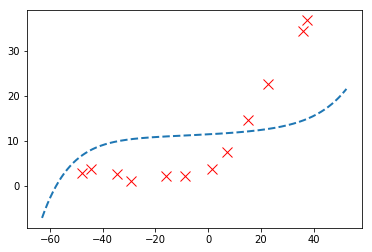

In [30]:
reg_lambda = 100
theta = trainLinearReg(X_poly, y, reg_lambda)
plotFit(np.min(X), np.max(X), mu, sigma, theta, p, X, y)

In [31]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, reg_lambda)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.114778
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 112.782289
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 132.620323
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 117.349131
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 109.921330
         Iterations: 13
         Function evaluations: 16

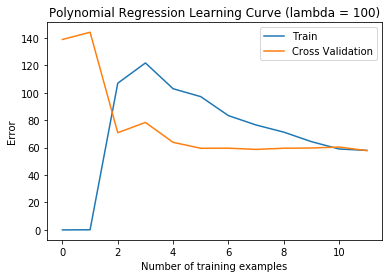

In [32]:
plt.plot(range(m),error_train)
plt.plot(range(m),error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(reg_lambda))
plt.legend(['Train','Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

For lambda = 100, we see a polynomial fit that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

## 3.4 Selecting lambda using a cross validation set

From the previous parts of the exercise, we observed that the value of lambda can significantly affect the result of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization (lambda = 0) fits the training set well, but does not generalize. Conversely, a model with too much regularization (lambda = 100) does not fit the training set and testing set well.

In this section, we will implement an automated method to select the lambda parameter. We will use a cross validation set to evaluate how good each lambda value is. After selecting the best lambda value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

In [33]:
# validationCurve() generate the train and validation errors needed to plot
# a validation curve that we can use to select lamnda
def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    error_train = np.zeros([len(lambda_vec),1])
    error_val = np.zeros([len(lambda_vec),1])
    for i in range(len(lambda_vec)):
        reg_lambda = lambda_vec[i]
        theta = trainLinearReg(X, y, reg_lambda, 100)
        d_train = np.dot(X, theta) - y
        error_train[i] = np.dot(d_train.T, d_train)/float(2*(X.shape[0]))
        d_val = np.dot(Xval, theta) - yval
        error_val[i] = np.dot(d_val.T, d_val)/float(2*Xval.shape[0])
    return lambda_vec, error_train, error_val

In [34]:
# calculate train erros and validation errors using different lambda
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

Optimization terminated successfully.
         Current function value: 0.028891
         Iterations: 78
         Function evaluations: 79
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 0.174792
         Iterations: 71
         Function evaluations: 72
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 0.249933
         Iterations: 65
         Function evaluations: 67
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.385063
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 0.669275
         Iterations: 46
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 1.443470
         Iterations: 40
         Function evaluations: 41
  

In [35]:
print('lambda | Train Error | Cross Validation Error')
for i in range(len(lambda_vec)):
    print('{} | {} | {}'.format(lambda_vec[i], error_train[i], error_val[i]))

lambda | Train Error | Cross Validation Error
0.0 | [0.02889073] | [54.15983755]
0.001 | [0.11269185] | [9.83620023]
0.003 | [0.17096228] | [16.29604612]
0.01 | [0.2214933] | [16.94849372]
0.03 | [0.28184916] | [12.82773536]
0.1 | [0.45931986] | [7.58683076]
0.3 | [0.92176235] | [4.63683312]
1.0 | [2.07618825] | [4.26063466]
3.0 | [4.90135242] | [3.82290713]
10.0 | [16.09220728] | [9.94550321]


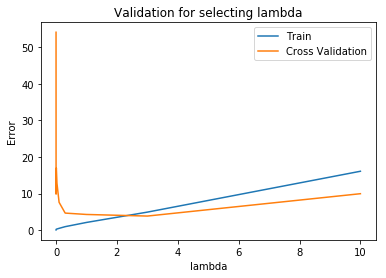

In [36]:
plt.plot(lambda_vec, error_train)
plt.plot(lambda_vec, error_val)
plt.legend(['Train','Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.title('Validation for selecting lambda')
plt.show()

In the above figure, we can see that the best value of lamnda is around 3.